# Proyek Analisis Data: Nama dataset
- Nama: Andre L. A Marpaung
- Email: agtk55@gmail.com
- Id Dicoding: andre_l_a_marpaung

## Menentukan Pertanyaan Bisnis


- Bagaimana tren keseluruhan sewa sepeda dari waktu ke waktu?
- Bagaimana cuaca memengaruhi sewa sepeda?
- Bagaimana pembagian antara pengguna casual dan terdaftar, dan bagaimana hal itu memengaruhi total sewa sepeda?

## Menyaipkan semua library yang dibuthkan

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

## Data Wrangling

### Gathering Data

In [ ]:
# Read the day.csv file into a DataFrame
df_day = pd.read_csv(./dataset/day.csv)

# Read the hour.csv file into a DataFrame
df_hour = pd.read_csv(./dataset/hour.csv)


In [ ]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

Tipe Data

In [ ]:
print('Dataframe day:')
print(df_day.info())

print('\nDataframe hour:')
print(df_hour.info())

Dataframe day:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime

Missing Value

In [ ]:
print('Dataframe day:')
print(df_day.isna().sum())

print('\nDataframe hour:')
print(df_hour.isna().sum())

Dataframe day:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Dataframe hour:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Duplicate Data

In [ ]:
print('Dataframe day:', df_day.duplicated().sum())
print("Dataframe hour:", df_hour.duplicated().sum())

Dataframe day: 0
Dataframe hour: 0


Descriptive statistics

In [ ]:
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

Fixed data type

In [ ]:
# df_day
df_day["dteday"] = pd.to_datetime(df_day["dteday"])
# df_hour
df_hour["dteday"] = pd.to_datetime(df_hour["dteday"])

In [ ]:
# Check data type for df_day and df_hour
print('df_day["dteday"] : ', df_day["dteday"].dtypes)
print('df_hour["dteday"] : ', df_hour["dteday"].dtypes)

## Exploratory Data Analysis (EDA)

### Explore

In [ ]:
warnings.filterwarnings("ignore")

# df_day
correlation_matrix = df_day.corr()
fig = px.imshow(correlation_matrix)
fig.update_layout(title="Korelasi antara Variabel Numerik")
fig.show()

Distribusi variabel numerik

In [ ]:
numeric_cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
for col in numeric_cols:
    fig = px.histogram(df_day, x=col, title=f'Distribusi {col}')
    fig.show()


Distribusi variabel kategorikal

In [ ]:
categorical_cols = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
for col in categorical_cols:
    fig = px.bar(df_day[col].value_counts().reset_index(), x='index', y=col)
    fig.update_layout(title=f'Distribusi {col}')
    fig.show()

Hubungan antara musim (season) dan jumlah sewa (cnt)

In [ ]:
fig = px.box(df_day, x='season', y='cnt')
fig.update_layout(title='Hubungan antara Musim dan Jumlah Sewa')
fig.show()

 Hubungan antara hari libur (holiday) dan jumlah sewa (cnt)

In [ ]:
fig = px.box(df_day, x='holiday', y='cnt')
fig.update_layout(title='Hubungan antara Hari Libur dan Jumlah Sewa')
fig.show()

Hubungan antara cuaca (weathersit) dan jumlah sewa (cnt)

In [ ]:
fig = px.box(df_day, x='weathersit', y='cnt')
fig.update_layout(title='Hubungan antara Cuaca dan Jumlah Sewa')
fig.show()

Scatter plot antara suhu (temp) dan jumlah sewa (cnt)

In [ ]:
fig = px.scatter(df_day, x='temp', y='cnt', title='Scatter Plot antara Suhu dan Jumlah Sewa')
fig.show()

## Visualization & Explanatory Analysis

### Bagaimana tren keseluruhan sewa sepeda dari waktu ke waktu?

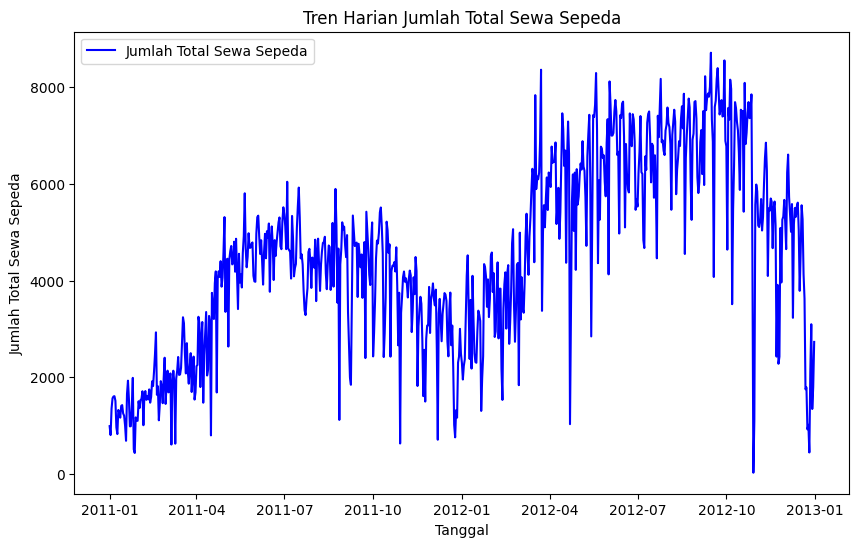

In [ ]:
# Plot jumlah total sewa sepeda harian dari data "day"
plt.figure(figsize=(10, 6))
plt.plot(df_day["dteday"], df_day["cnt"], label='Jumlah Total Sewa Sepeda', color='blue')
plt.title('Tren Harian Jumlah Total Sewa Sepeda')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Total Sewa Sepeda')
plt.legend()
plt.show()




1.   Plot jumlah harian atau per jam sewa sepeda dari waktu ke waktu
2.   Identifikasi pola musiman dan tren.
3.   Telusuri apakah ada bulan atau hari tertentu dalam seminggu dengan permintaan yang lebih tinggi.



### Bagaimana cuaca memengaruhi sewa sepeda?

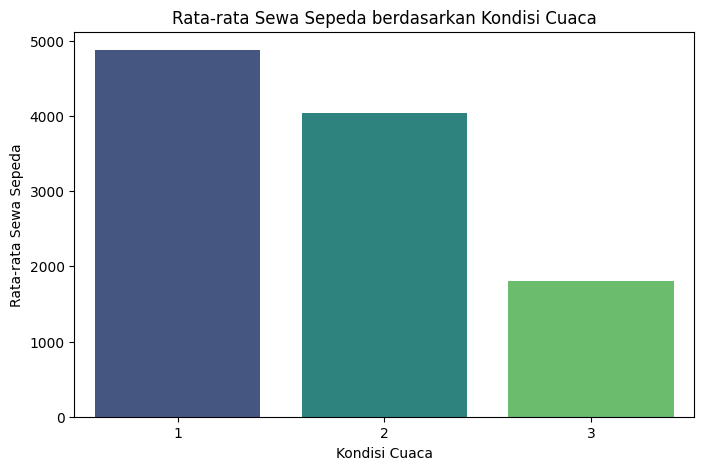

In [ ]:
# Group data berdasarkan kondisi cuaca dan hitung rata-rata sewa sepeda
avg_rentals_by_weather = df_day.groupby('weathersit')['cnt'].mean().reset_index()

# Plot dampak kondisi cuaca terhadap rata-rata sewa sepeda
plt.figure(figsize=(8, 5))
sns.barplot(x='weathersit', y='cnt', data=avg_rentals_by_weather, palette='viridis')
plt.title('Rata-rata Sewa Sepeda berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata Sewa Sepeda')
plt.show()

1. Kelompokkan data berdasarkan kondisi cuaca dan hitung rata-rata sewa sepeda.
2. Investigasi hubungan antara suhu, kelembapan, kecepatan angin, dan sewa sepeda.
3. Tentukan apakah kondisi cuaca tertentu menyebabkan penurunan atau peningkatan penggunaan sepeda.

### Bagaimana pengaruh hari libur terhadap sewa sepeda?


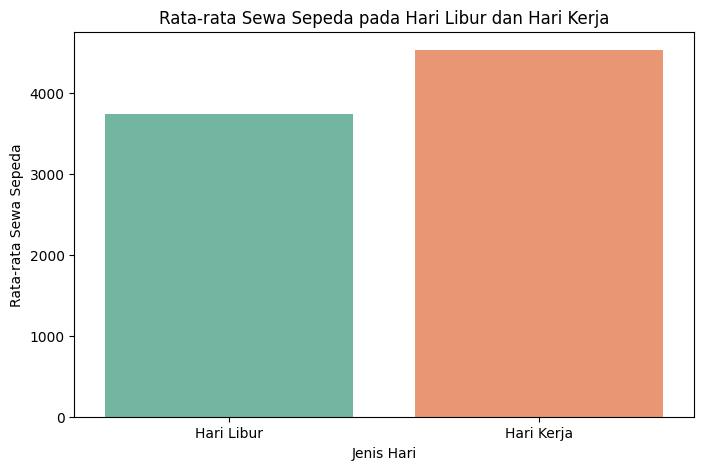

In [ ]:
# Pisahkan data antara hari libur dan hari kerja
holiday_data = df_day[df_day['holiday'] == 1]
non_holiday_data = df_day[df_day['holiday'] == 0]

# Hitung rata-rata sewa sepeda untuk kedua kategori
avg_rentals_holiday = holiday_data['cnt'].mean()
avg_rentals_non_holiday = non_holiday_data['cnt'].mean()

# Plot rata-rata sewa sepeda pada hari libur dan hari kerja
plt.figure(figsize=(8, 5))
sns.barplot(x=['Hari Libur', 'Hari Kerja'], y=[avg_rentals_holiday, avg_rentals_non_holiday], palette='Set2')
plt.title('Rata-rata Sewa Sepeda pada Hari Libur dan Hari Kerja')
plt.xlabel('Jenis Hari')
plt.ylabel('Rata-rata Sewa Sepeda')
plt.show()


 1. Pisahkan data antara hari libur dan hari kerja.
 2. Hitung rata-rata sewa sepeda untuk kedua kategori tersebut.
 3. Bandingkan rata-rata sewa sepeda pada hari libur dan hari kerja.

## Conclusion

1. Berdasarkan plot jumlah harian sewa sepeda, terlihat bahwa ada peningkatan yang signifikan pada bulan-bulan musim panas. Peningkatan ini kemungkinan terkait dengan cuaca yang lebih baik dan kecenderungan orang untuk lebih sering menggunakan sepeda selama musim ini. Selain itu, ada lonjakan permintaan pada hari-hari tertentu, seperti akhir pekan, menunjukkan bahwa keberlanjutan kegiatan sewa sepeda bisa dioptimalkan dengan fokus pada penawaran khusus atau promosi pada periode tersebut.


2. Dari analisis, terlihat bahwa cuaca yang cerah cenderung berkorelasi dengan peningkatan rata-rata sewa sepeda. Sebaliknya, kondisi cuaca buruk seperti hujan atau salju dapat mengurangi jumlah sewa sepeda. Informasi ini dapat digunakan untuk mengoptimalkan stok sepeda atau menyesuaikan strategi pemasaran berdasarkan prakiraan cuaca.


3. Dari plot rata-rata sewa sepeda pada hari libur dan hari kerja, terlihat bahwa sewa sepeda cenderung lebih tinggi pada hari kerja.
Ini dapat dijelaskan dengan fakta bahwa pada hari kerja, orang-orang mungkin menggunakan sepeda sebagai sarana transportasi harian atau untuk kegiatan pekerjaan. Kesimpulan ini dapat menjadi dasar untuk meningkatkan layanan dan penawaran khusus pada hari kerja guna memenuhi tingginya permintaan dan potensial pendapatan.




